## Código Iza

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [62]:
%matplotlib inline
import parser
from mpmath import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 6]

In [53]:
arr_t = []
arr_y = []
method_cache = dict()

In [3]:
def show_graphic():
    plt.ylabel("y values")
    plt.xlabel("t values")
    plt.legend()

In [4]:
def do_eval(t, y, expr):
    return eval(expr)

In [5]:
def print_in_file(method, h):
    file_out = open("saida.txt", "a")
    file_out.write("Metodo de " + str(method) + "\n")
    file_out.write("y( " + str(arr_t[0]) + " ) = " + str(arr_y[0]) + "\n")
    file_out.write("h = " + str(h) + "\n")

    for i in range(0, len(arr_y)):
        file_out.write(str(i) + " " + str(arr_y[i]) + "\n")

    file_out.write("\n")


In [6]:
## Euler 
def euler_method(y0, t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(0, n + 1):        
		arr_t.append(t0)
		arr_y.append(y0)

        # yn+1 = yn + h*f(tn, yn)
		y0 += h*do_eval(t0, y0, expr)
		t0 += h

	return t0

In [7]:
## Euler Inverso
def backward_euler_method(y0, t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(0, n + 1):        
		arr_t.append(t0)
		arr_y.append(y0)
        
		# yn+1 = yn + h*f(tn, yn)
		y_euler = y0 + h*do_eval(t0, y0, expr) # descobre yn+1
        
		t0 += h
        
		# yn+1 = yn + h*f(tn+1, yn+1)
		y0 += h*do_eval(t0, y_euler, expr)
	
	return t0

In [8]:
## Euler Melhorado
def best_euler_method(y0, t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(0, n + 1):        
		arr_t.append(t0)
		arr_y.append(y0)
        
		# f(tn, yn)
		f_tn_yn = do_eval(t0, y0, expr)
		
		# yn+1 = yn + h*f(tn, yn)
		y_euler = y0 + h*f_tn_yn # descobre yn+1
		
		t0 += h
		
		# f(tn+1, yn+1)
		f_tn1_yn1 = do_eval(t0, y_euler, expr)
		
		# yn+1 = yn + (h/2)*(f(tn, yn) + f(tn+1, yn+1))
		y0 += (h/2)*(f_tn_yn + f_tn1_yn1)

	return t0

In [9]:
## Runge Kutta
def runge_kutta_method(y0, t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(0, n + 1):        
		arr_t.append(t0)
		arr_y.append(y0)
        
		### Kn1 ###
		# f(tn, yn)
		kn1 = do_eval(t0, y0, expr)

		### Kn2 ###
		# f(tn + h/2, yn + (h/2)*kn1)
		kn2 = do_eval(t0 + h/2, y0 + (h/2)*kn1, expr)

		### Kn3 ###
		# f(tn + h/2, yn + (h/2)*kn2)
		kn3 = do_eval(t0 + h/2, y0 + (h/2)*kn2, expr)

		### Kn4 ###
		# f(tn + h, yn + h*kn3)
		kn4 = do_eval(t0 + h, y0 + h*kn3, expr)
		
		# yn+1 = yn + (h/6)*(kn1 + kn2 + kn3 + kn4)
		y0 += (h/6)*(kn1 + 2*kn2 + 2*kn3 + kn4)
		t0 += h

	return t0

In [10]:
## Runge Kutta
def runge_kutta_method(y0, t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(0, n + 1):        
		arr_t.append(t0)
		arr_y.append(y0)
        
		### Kn1 ###
		# f(tn, yn)
		kn1 = do_eval(t0, y0, expr)

		### Kn2 ###
		# f(tn + h/2, yn + (h/2)*kn1)
		kn2 = do_eval(t0 + h/2, y0 + (h/2)*kn1, expr)

		### Kn3 ###
		# f(tn + h/2, yn + (h/2)*kn2)
		kn3 = do_eval(t0 + h/2, y0 + (h/2)*kn2, expr)

		### Kn4 ###
		# f(tn + h, yn + h*kn3)
		kn4 = do_eval(t0 + h, y0 + h*kn3, expr)
		
		# yn+1 = yn + (h/6)*(kn1 + kn2 + kn3 + kn4)
		y0 += (h/6)*(kn1 + 2*kn2 + 2*kn3 + kn4)
		t0 += h

	return t0

In [11]:
## Adams Bashforth - ordem 2
def ab_2(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# yn+1 = yn + h*((3/2)*f(tn, yn) - (1/2)*f(tn-1, yn-1))
		y0 += h*((3/2)*f_tn_yn - (1/2)*f_tn1_yn1)
		t0 += h

		arr_y.append(y0)


In [13]:
## Adams Bashforth - ordem 3
def ab_3(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# yn+1 = yn + h*((23/12)*f(tn, yn) - (4/3)*f(tn-1, yn-1) + (5/12)*f(tn-2, yn-2))
		y0 += h*((23/12)*f_tn_yn - (4/3)*f_tn1_yn1 + (5/12)*f_tn2_yn2)
		t0 += h

		arr_y.append(y0)


In [14]:
## Adams Bashforth - ordem 4
def ab_4(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# yn+1 = yn + h*((55/24)*f(tn, yn) - (59/24)*f(tn-1, yn-1) + (37/24)*f(tn-2, yn-2) - (3/8)*f(tn-3, yn-3))
		y0 += h*((55/24)*f_tn_yn - (59/24)*f_tn1_yn1 + (37/24)*f_tn2_yn2 - (3/8)*f(tn-3, yn-3))
		t0 += h

		arr_y.append(y0)


In [15]:
## Adams Bashforth - ordem 5
def ab_5(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# yn+1 = yn + h*((1901/720)*f(tn, yn) - (1387/360)*f(tn-1, yn-1) + (109/30)*f(tn-2, yn-2) - (637/360)*f(tn-3, yn-3) + (251/720)*f(tn-4, yn-4))
		y0 += h*((1901/720)*f_tn_yn - (1387/360)*f_tn1_yn1 + (109/30)*f_tn2_yn2 - (637/360)*f_tn3_yn3 + (251/720)*f_tn4_yn4)
		t0 += h

		arr_y.append(y0)


In [16]:
## Adams Bashforth - ordem 6
def ab_6(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# f(tn-5, yn-5)
		f_tn5_yn5 = do_eval(arr_t[len(arr_y) - 6], arr_y[len(arr_y) - 6], expr)

		# yn+1 = yn + h*((4277/1440)*f(tn, yn) - (2641/480)*f(tn-1, yn-1) + (4991/720)*f(tn-2, yn-2) - (3649/720)*f(tn-3, yn-3) + (959/480)*f(tn-4, yn-4) - (95/288)*f(tn-5, yn-5))
		y0 += h*((4277/1440)*f_tn_yn - (2641/480)*f_tn1_yn1 + (4991/720)*f_tn2_yn2 - (3649/720)*f_tn3_yn3 + (959/480)*f_tn4_yn4 - (95/288)*f_tn5_yn5)
		t0 += h

		arr_y.append(y0)


In [17]:
## Adams Bashforth - ordem 7
def ab_7(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# f(tn-5, yn-5)
		f_tn5_yn5 = do_eval(arr_t[len(arr_y) - 6], arr_y[len(arr_y) - 6], expr)

		# f(tn-6, yn-6)
		f_tn6_yn6 = do_eval(arr_t[len(arr_y) - 7], arr_y[len(arr_y) - 7], expr)

		# yn+1 = yn + h*((198721/60480)*f(tn, yn) - (18637/2520)*f(tn-1, yn-1) + (235183/20160)*f(tn-2, yn-2) - (10754/945)*f(tn-3, yn-3) + (135713/20160)*f(tn-4, yn-4) - (5603/2520)*f(tn-5, yn-5) + (19087/60480)*f(tn-6, yn-6))
		y0 += h*((198721/60480)*f_tn_yn - (18637/2520)*f_tn1_yn1 + (235183/20160)*f_tn2_yn2 - (10754/945)*f_tn3_yn3 + (135713/20160)*f_tn4_yn4 - (5603/2520)*f_tn5_yn5 + (19087/60480)*f_tn6_yn6)
		t0 += h

		arr_y.append(y0)



In [18]:
## Adams Bashforth - ordem 8
def ab_8(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# f(tn-5, yn-5)
		f_tn5_yn5 = do_eval(arr_t[len(arr_y) - 6], arr_y[len(arr_y) - 6], expr)

		# f(tn-6, yn-6)
		f_tn6_yn6 = do_eval(arr_t[len(arr_y) - 7], arr_y[len(arr_y) - 7], expr)
		
		# f(tn-6, yn-6)
		f_tn7_yn7 = do_eval(arr_t[len(arr_y) - 8], arr_y[len(arr_y) - 8], expr)

		#yn+1 = yn + h*((16083/4480)*f(tn, yn) - (1152169/120960)*f(tn-1, yn-1) + (242653/13440)*f(tn-2, yn-2) - (296053/13440)*f(tn-3, yn-3) + (2102243/120960)*f(tn-4, yn-4) - (115747/13440)*f(tn-5, yn-5) + (32863/13440)*f(tn-6, yn-6) - (5257/17280)*f(tn-7, yn-7))
		y0 += h*((16083/4480)*f_tn_yn - (1152169/120960)*f_tn1_yn1 + (242653/13440)*f_tn2_yn2 - (296053/13440)*f_tn3_yn3 + (2102243/120960)*f_tn4_yn4 - (115747/13440)*f_tn5_yn5 + (32863/13440)*f_tn6_yn6 - (5257/17280)*f_tn7_yn7)
		t0 += h

		arr_y.append(y0)


In [19]:
## Adams Bashforth - Chamadas
def adams_bashforth_method(t0, h, n, fty, order):
    
	# yn+1 = yn + h*((3/2)*f(tn, yn) - (1/2)*f(tn-1, yn-1))
	if order == 2:
		ab_2(t0, h, n, fty)

	# yn+1 = yn + h*((23/12)*f(tn, yn) - (4/3)*f(tn-1, yn-1) + (5/12)*f(tn-2, yn-2))
	elif order == 3:
		ab_3(t0, h, n, fty)

	# yn+1 = yn + h*((55/24)*f(tn, yn) - (59/24)*f(tn-1, yn-1) + (37/24)*f(tn-2, yn-2) - (3/8)*f(tn-3, yn-3))
	elif order == 4:
		ab_4(t0, h, n, fty)

	# yn+1 = yn + h*((1901/720)*f(tn, yn) - (1387/360)*f(tn-1, yn-1) + (109/30)*f(tn-2, yn-2) - (637/360)*f(tn-3, yn-3) + (251/720)*f(tn-4, yn-4))
	elif order == 5:
		ab_5(t0, h, n, fty)

	# yn+1 = yn + h*((4277/1440)*f(tn, yn) - (2641/480)*f(tn-1, yn-1) + (4991/720)*f(tn-2, yn-2) - (3649/720)*f(tn-3, yn-3) + (959/480)*f(tn-4, yn-4) - (95/288)*f(tn-5, yn-5))
	elif order == 6:
		ab_6(t0, h, n, fty)

	# yn+1 = yn + h*((198721/60480)*f(tn, yn) - (18637/2520)*f(tn-1, yn-1) + (235183/20160)*f(tn-2, yn-2) - (10754/945)*f(tn-3, yn-3) + (135713/20160)*f(tn-4, yn-4) - (5603/2520)*f(tn-5, yn-5) + (19087/60480)*f(tn-6, yn-6))
	elif order == 7:
		ab_7(t0, h, n, fty)
	
	#yn+1 = yn + h*((16083/4480)*f(tn, yn) - (1152169/120960)*f(tn-1, yn-1) + (242653/13440)*f(tn-2, yn-2) - (296053/13440)*f(tn-3, yn-3) + (2102243/120960)*f(tn-4, yn-4) - (115747/13440)*f(tn-5, yn-5) + (32863/13440)*f(tn-6, yn-6) - (5257/17280)*f(tn-7, yn-7))
	elif order == 8:
		ab_8(t0, h, n, fty)


In [20]:
## Adams Multhon - ordem 2
def am_2(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = y0 + h*do_eval(arr_t[len(arr_y) - 1], y0, expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = y0 + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# yn+1 = yn + (h/2)*(f(tn+1, yn+1) + f(tn, yn))
		y0 += (h/2)*(f_tn_yn + f_tnp1_ynp1)
		t0 += h

		arr_y.append(y0)


In [21]:
## Adams Multhon - ordem 3
def am_3(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = y0 + h*do_eval(arr_t[len(arr_y) - 1], y0, expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = y0 + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# yn+1 = yn + h*((5/12)*f(tn+1, yn+1) + (2/3)*f(tn, yn) - (1/12)*f(tn-1, yn-1))
		y0 += h*((5/12)*f_tnp1_ynp1 + (2/3)*f_tn_yn - (1/12)*f_tn1_yn1)
		t0 += h

		arr_y.append(y0)

In [22]:
## Adams Multhon - ordem 4
def am_4(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = y0 + h*do_eval(arr_t[len(arr_y) - 1], y0, expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = y0 + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# yn+1 = yn + h*((3/8)*f(tn+1, yn+1) + (19/24)*f(tn, yn) - (5/24)*f(tn-1, yn-1) + (1/24)*f(tn-2, yn-2))
		y0 += h*((3/8)*f_tnp1_ynp1 + (19/24)*f_tn_yn - (5/24)*f_tn1_yn1 + (1/24)*f_tn2_yn2)
		t0 += h

		arr_y.append(y0)

In [23]:
## Adams Multhon - ordem 5
def am_5(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = y0 + h*do_eval(arr_t[len(arr_y) - 1], y0, expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = y0 + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# yn+1 = yn + h*((251/720)*f(tn+1, yn+1) + (323/360)*f(tn, yn) - (11/30)*f(tn-1, yn-1) + (53/360)*f(tn-2, yn-2) - (19/720)*f(tn-3, yn-3))
		y0 += h*((251/720)*f_tnp1_ynp1 + (323/360)*f_tn_yn - (11/30)*f_tn1_yn1 + (53/360)*f_tn2_yn2 - (19/720)*f_tn3_yn3)
		t0 += h

		arr_y.append(y0)


In [24]:
## Adams Multhon - ordem 6
def am_6(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = y0 + h*do_eval(arr_t[len(arr_y) - 1], y0, expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = y0 + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# yn+1 = yn + h*((95/288)*f(tn+1, yn+1) + (1427/1440)*f(tn, yn) - (133/240)*f(tn-1, yn-1) + (241/720)*f(tn-2, yn-2) - (173/1440)*f(tn-3, yn-3) + (3/160)*f(tn-4, yn-4))
		y0 += h*((95/288)*f_tnp1_ynp1 + (1427/1440)*f_tn_yn - (133/240)*f_tn1_yn1 + (241/720)*f_tn2_yn2 - (173/1440)*f_tn3_yn3 + (3/160)*f_tn4_yn4)
		t0 += h

		arr_y.append(y0)


In [25]:
## Adams Multhon - ordem 7
def am_7(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = y0 + h*do_eval(arr_t[len(arr_y) - 1], y0, expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = y0 + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# f(tn-5, yn-5)
		f_tn5_yn5 = do_eval(arr_t[len(arr_y) - 6], arr_y[len(arr_y) - 6], expr)

		# yn+1 = yn + h*((19087/60480)*f(tn+1, yn+1) + (2713/2520)*f(tn, yn) - (15487/20160)*f(tn-1, yn-1) + (586/945)*f(tn-2, yn-2) - (5737/20160)*f(tn-3, yn-3) + (263/2520)*f(tn-4, yn-4) - (863/60480)*f(tn-5, yn-5))
		y0 += h*((19087/60480)*f_tnp1_ynp1 + (2713/2520)*f_tn_yn - (15487/20160)*f_tn1_yn1 + (586/945)*f_tn2_yn2 - (5737/20160)*f_tn3_yn3 + (263/2520)*f_tn4_yn4 - (863/60480)*f_tn5_yn5)
		t0 += h

		arr_y.append(y0)

In [26]:
## Adams Multhon - ordem 8
def am_8(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	y0 = arr_y[len(arr_y) - 1]

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = y0 + h*do_eval(arr_t[len(arr_y) - 1], y0, expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = y0 + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# f(tn, yn)
		f_tn_yn = do_eval(arr_t[len(arr_y) - 1], y0, expr)

		# f(tn-1, yn-1)
		f_tn1_yn1 = do_eval(arr_t[len(arr_y) - 2], arr_y[len(arr_y) - 2], expr)

		# f(tn-2, yn-2)
		f_tn2_yn2 = do_eval(arr_t[len(arr_y) - 3], arr_y[len(arr_y) - 3], expr)

		# f(tn-3, yn-3)
		f_tn3_yn3 = do_eval(arr_t[len(arr_y) - 4], arr_y[len(arr_y) - 4], expr)

		# f(tn-4, yn-4)
		f_tn4_yn4 = do_eval(arr_t[len(arr_y) - 5], arr_y[len(arr_y) - 5], expr)

		# f(tn-5, yn-5)
		f_tn5_yn5 = do_eval(arr_t[len(arr_y) - 6], arr_y[len(arr_y) - 6], expr)

		# f(tn-6, yn-6)
		f_tn5_yn5 = do_eval(arr_t[len(arr_y) - 7], arr_y[len(arr_y) - 7], expr)

		#yn+1 = yn + h*((5257/17280)*f(tn+1, yn+1) + (139849/120960)*f(tn, yn) - (4511/4480)*f(tn-1, yn-1) + (123133/120960)*f(tn-2, yn-2) - (88574/120960)*f(tn-3, yn-3) + (1537/4480)*f(tn-4, yn-4) - (11351/120960)*f(tn-5, yn-5) + (275/24192)*f(tn-6, yn-6))
		y0 += h*((5257/17280)*f_tnp1_ynp1 + (139849/120960)*f_tn_yn - (4511/4480)*f_tn1_yn1 + (123133/120960)*f_tn2_yn2 - (88574/120960)*f_tn3_yn3 + (1537/4480)*f_tn4_yn4 - (11351/120960)*f_tn5_yn5 + (275/24192)*f_tn6_yn6)
		t0 += h

		arr_y.append(y0)


In [27]:
## Adams Multhon - Chamadas
def adams_multon_method(t0, h, n, fty, order):
	# yn+1 = yn + (h/2)*(f(tn+1, yn+1) + f(tn, yn))
	if order == 2:
		am_2(t0, h, n, fty)

	# yn+1 = yn + h*((5/12)*f(tn+1, yn+1) + (2/3)*f(tn, yn) - (1/12)*f(tn-1, yn-1))
	elif order == 3:
		am_3(t0, h, n, fty)

	# yn+1 = yn + h*((3/8)*f(tn+1, yn+1) + (19/24)*f(tn, yn) - (5/24)*f(tn-1, yn-1) + (1/24)*f(tn-2, yn-2))
	elif order == 4:
		am_4(t0, h, n, fty)

	# yn+1 = yn + h*((251/720)*f(tn+1, yn+1) + (323/360)*f(tn, yn) - (11/30)*f(tn-1, yn-1) + (53/360)*f(tn-2, yn-2) - (19/720)*f(tn-3, yn-3))
	elif order == 5:
		am_5(t0, h, n, fty)

	# yn+1 = yn + h*((95/288)*f(tn+1, yn+1) + (1427/1440)*f(tn, yn) - (133/240)*f(tn-1, yn-1) + (241/720)*f(tn-2, yn-2) - (173/1440)*f(tn-3, yn-3) + (3/160)*f(tn-4, yn-4))
	elif order == 6:
		am_6(t0, h, n, fty)

	# yn+1 = yn + h*((19087/60480)*f(tn+1, yn+1) + (2713/2520)*f(tn, yn) - (15487/20160)*f(tn-1, yn-1) + (586/945)*f(tn-2, yn-2) - (5737/20160)*f(tn-3, yn-3) + (263/2520)*f(tn-4, yn-4) - (863/60480)*f(tn-5, yn-5))
	elif order == 7:
		am_7(t0, h, n, fty)
	
	#yn+1 = yn + h*((5257/17280)*f(tn+1, yn+1) + (139849/120960)*f(tn, yn) - (4511/4480)*f(tn-1, yn-1) + (123133/120960)*f(tn-2, yn-2) - (88574/120960)*f(tn-3, yn-3) + (1537/4480)*f(tn-4, yn-4) - (11351/120960)*f(tn-5, yn-5) + (275/24192)*f(tn-6, yn-6))
	elif order == 8:
		am_8(t0, h, n, fty)

In [28]:
## Fórmula Inversa - ordem 2
def bf_2(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]

		# yn+1 = (4/3)*yn - (1/3)*yn-1 + (2/3)*h*f(tn+1, yn+1)
		y0 = (4/3)*yn - (1/3)*yn1 + (2/3)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [29]:
## Fórmula Inversa - ordem 3
def bf_3(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]
		
		# yn-2
		yn2 = arr_y[len(arr_y) - 3]

		# yn+1 = (18/11)*yn - (9/11)*yn-1 + (2/11)*yn-2 + (6/11)*h*f(tn+1, yn+1)
		y0 = (18/11)*yn - (9/11)*yn1 + (2/11)*yn2 + (6/11)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [30]:
## Fórmula Inversa - ordem 4
def bf_4(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]
		
		# yn-2
		yn2 = arr_y[len(arr_y) - 3]

		# yn-3
		yn3 = arr_y[len(arr_y) - 4]

		# yn+1 = (48/25)*yn - (36/25)*yn-1 + (16/25)*yn-2 - (3/25)*yn-3 + (12/25)*h*f(tn+1, yn+1)
		y0 = (48/25)*yn - (36/25)*yn1 + (16/25)*yn2 - (3/25)*yn3 + (12/25)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [31]:
## Fórmula Inversa - ordem 5
def bf_5(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]
		
		# yn-2
		yn2 = arr_y[len(arr_y) - 3]

		# yn-3
		yn3 = arr_y[len(arr_y) - 4]

		# yn-4
		yn4 = arr_y[len(arr_y) - 5]

		# yn+1 = (300/137)*yn - (300/137)*yn-1 + (200/137)*yn-2 - (75/137)*yn-3 + (12/137)*yn-4 + (60/137)*h*f(tn+1, yn+1)
		y0 = (300/137)*yn - (300/137)*yn1 + (200/137)*yn2 - (75/137)*yn3 + (12/137)*yn4 + (60/137)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [32]:
## Fórmula Inversa - ordem 6
def bf_6(t0, h, n, fty):
	expr = parser.expr(fty).compile()

	for i in range(len(arr_y), n + 1):
		arr_t.append(t0)

		### euler inverso para estimar yn+1 ###
		# yn+1 = yn + h*f(tn, yn)
		yn1_euler = arr_y[len(arr_y) - 1] + h*do_eval(arr_t[len(arr_y) - 1], arr_y[len(arr_y) - 1], expr) # descobre yn+1
 
		# yn+1 = yn + h*f(tn+1, yn+1)
		yn1_be = arr_y[len(arr_y) - 1] + h*do_eval(t0, yn1_euler, expr)
		### euler inverso para estimar yn+1 ###

		# f(tn+1, yn+1)
		f_tnp1_ynp1 = do_eval(arr_t[len(arr_t) - 1], yn1_be, expr)

		# yn
		yn = arr_y[len(arr_y) - 1]

		# yn-1
		yn1 = arr_y[len(arr_y) - 2]
		
		# yn-2
		yn2 = arr_y[len(arr_y) - 3]

		# yn-3
		yn3 = arr_y[len(arr_y) - 4]

		# yn-4
		yn4 = arr_y[len(arr_y) - 5]
		
		# yn-5
		yn5 = arr_y[len(arr_y) - 6]

		# yn+1 = (360/147)*yn - (450/147)*yn-1 + (400/147)*yn-2 - (225/147)*yn-3 + (72/147)*yn-4 - (10/147)*yn-5 + (60/147)*h*f(tn+1, yn+1)
		y0 = (360/147)*yn - (450/147)*yn1 + (400/147)*yn2 - (225/147)*yn3 + (72/147)*yn4 - (10/147)*yn5 + (60/147)*h*f_tnp1_ynp1
		t0 += h

		arr_y.append(y0)

In [33]:
## Fórmula Inversa - Chamadas
def backward_formulas_method(t0, h, n, fty, order):
	# yn+1 = (4/3)*yn - (1/3)*yn-1 + (2/3)*h*f(tn+1, yn+1)
	if order == 2:
		bf_2(t0, h, n, fty)

	# yn+1 = (18/11)*yn - (9/11)*yn-1 + (2/11)*yn-2 + (6/11)*h*f(tn+1, yn+1)
	elif order == 3:
		bf_3(t0, h, n, fty)

	# yn+1 = (48/25)*yn - (36/25)*yn-1 + (16/25)*yn-2 - (3/25)*yn-3 + (12/25)*h*f(tn+1, yn+1)
	elif order == 4:
		bf_4(t0, h, n, fty)

	# yn+1 = (300/137)*yn - (300/137)*yn-1 + (200/137)*yn-2 - (75/137)*yn-3 + (12/137)*yn-4 + (60/137)*h*f(tn+1, yn+1)
	elif order == 5:
		bf_5(t0, h, n, fty)

	# yn+1 = (360/147)*yn - (450/147)*yn-1 + (400/147)*yn-2 - (225/147)*yn-3 + (72/147)*yn-4 - (10/147)*yn-5 + (60/147)*h*f(tn+1, yn+1)
	elif order == 6:
		bf_6(t0, h, n, fty)

In [55]:
## Main
def main(callback):
    with open("entrada.txt") as file_in:
        global method_cache
        method_cache = dict()
        for line in file_in:
            strin = line.split(' ')
            
            global arr_y
            global arr_t
            
            arr_y.clear()
            arr_t.clear()
            strmethod = ""

            if strin[0] == "euler" or strin[0] == "euler_inverso" or strin[0] == "euler_aprimorado" or strin[0] == "runge_kutta":
                y0 = strin[1]
                t0 = strin[2]
                h = strin[3]
                n = strin[4]
                fty = strin[5].split("\n ")

                if strin[0] == "euler":   
                    euler_method(float(y0), float(t0), float(h), int(n), fty[0])

                    print_in_file("Euler", h)
                    strmethod = "Euler"

                elif strin[0] == "euler_inverso":
                    backward_euler_method(float(y0), float(t0), float(h), int(n), fty[0])

                    print_in_file("Euler Inverso", h)
                    strmethod = "Euler Inverso"

                elif strin[0] == "euler_aprimorado":
                    best_euler_method(float(y0), float(t0), float(h), int(n), fty[0])

                    print_in_file("Euler Aprimorado", h)
                    strmethod = "Euler Aprimorado"

                elif strin[0] == "runge_kutta":
                    runge_kutta_method(float(y0), float(t0), float(h), int(n), fty[0])

                    print_in_file("Runge-Kutta", h)
                    strmethod = "Runge-Kutta"

                plt.plot(arr_t, arr_y, label = strmethod)

            elif strin[0] == "adam_bashforth":
                order_str = strin[len(strin) - 1].split("\n")
                order = int(order_str[0])

                arr_y = [float(a) for a in strin[1:order + 1]]

                t0 = strin[order + 1]
                h = strin[order + 2]
                n = strin[order + 3]
                fty = strin[order + 4]

                t0 = float(t0)
                h = float(h)

                for i in range(0, len(arr_y)):
                    arr_t.append(t0)
                    t0 += h

                adams_bashforth_method(t0, h, int(n), fty, int(order))

                strmethod = "Adams Bashforth " + str(order) + " ordem"
                print_in_file(strmethod, h)

                plt.plot(arr_t, arr_y, label = strmethod)

            elif strin[0] == "adam_bashforth_by_euler" or strin[0] == "adam_bashforth_by_euler_inverso" or strin[0] == "adam_bashforth_by_euler_aprimorado" or strin[0] == "adam_bashforth_by_runge_kutta":
                y0 = strin[1]
                t0 = strin[2]
                h = strin[3]
                n = strin[4]
                fty = strin[5]
                order = strin[6].split("\n")

                if strin[0] == "adam_bashforth_by_euler":
                    t0 = euler_method(float(y0), float(t0), float(h), int(order[0]) - 1, fty)
                    adams_bashforth_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Adams Bashforth de " + str(order[0]) + " Ordem por Euler"
                    print_in_file(strmethod, h)

                elif strin[0] == "adam_bashforth_by_euler_inverso":
                    t0 = backward_euler_method(float(y0), float(t0), float(h), int(order[0]) - 1, fty)
                    adams_bashforth_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Adams Bashforth de " + str(order[0]) + " Ordem por Euler Inverso"
                    print_in_file(strmethod, h)

                elif strin[0] == "adam_bashforth_by_euler_aprimorado":
                    t0 = best_euler_method(float(y0), float(t0), float(h), int(order[0]) - 1, fty)
                    adams_bashforth_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Adams Bashforth de " + str(order[0]) + " Ordem por Euler Aprimorado"
                    print_in_file(strmethod, h)

                elif strin[0] == "adam_bashforth_by_runge_kutta":
                    t0 = runge_kutta_method(float(y0), float(t0), float(h), int(order[0]) - 1, fty)
                    adams_bashforth_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Adams Bashforth " + str(order[0])
                    print_in_file(strmethod, h)

                plt.plot(arr_t, arr_y, label = strmethod)

            elif strin[0] == "adam_multon":
                order_str = strin[len(strin) - 1].split("\n")
                order = int(order_str[0])

                arr_y = [float(a) for a in strin[1:order]]

                t0 = strin[order]
                h = strin[order + 1]
                n = strin[order + 2]
                fty = strin[order + 3]

                t0 = float(t0)
                h = float(h)

                for i in range(0, len(arr_y)):
                    arr_t.append(t0)
                    t0 += h

                adams_multon_method(t0, h, int(n), fty, int(order))

                strmethod = "Adams Multon " + str(order) + " ordem"
                print_in_file(strmethod, h)

                plt.plot(arr_t, arr_y, label = strmethod)

            elif strin[0] == "adam_multon_by_euler" or strin[0] == "adam_multon_by_euler_inverso" or strin[0] == "adam_multon_by_euler_aprimorado" or strin[0] == "adam_multon_by_runge_kutta":
                y0 = strin[1]
                t0 = strin[2]
                h = strin[3]
                n = strin[4]
                fty = strin[5]
                order = strin[6].split("\n")

                if strin[0] == "adam_multon_by_euler":
                    t0 = euler_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
                    adams_multon_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Adams Multon de " + str(order[0]) + " Ordem por Euler"
                    print_in_file(strmethod, h)

                elif strin[0] == "adam_multon_by_euler_inverso":
                    t0 = backward_euler_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
                    adams_multon_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Adams Multon de " + str(order[0]) + " Ordem por Euler Inverso"
                    print_in_file(strmethod, h)

                elif strin[0] == "adam_multon_by_euler_aprimorado":
                    t0 = best_euler_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
                    adams_multon_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Adams Multon de " + str(order[0]) + " Ordem por Euler Aprimorado"
                    print_in_file(strmethod, h)

                elif strin[0] == "adam_multon_by_runge_kutta":
                    t0 = runge_kutta_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
                    adams_bashforth_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Adams Multon " + str(order[0])
                    print_in_file(strmethod, h)

                plt.plot(arr_t, arr_y, label = strmethod)

            elif strin[0] == "formula_inversa":
                order_str = strin[len(strin) - 1].split("\n")
                order = int(order_str[0])

                arr_y = [float(a) for a in strin[1:order]]

                t0 = strin[order]
                h = strin[order + 1]
                n = strin[order + 2]
                fty = strin[order + 3]

                t0 = float(t0)
                h = float(h)

                for i in range(0, len(arr_y)):
                    arr_t.append(t0)
                    t0 += h

                backward_formulas_method(t0, h, int(n), fty, int(order))

                strmethod = "Formula inversa de " + str(order) + " ordem"
                print_in_file(strmethod, h)

                plt.plot(arr_t, arr_y, label = strmethod)

            elif strin[0] == "formula_inversa_by_euler" or strin[0] == "formula_inversa_by_euler_inverso" or strin[0] == "formula_inversa_by_euler_aprimorado" or strin[0] == "formula_inversa_by_runge_kutta":
                y0 = strin[1]
                t0 = strin[2]
                h = strin[3]
                n = strin[4]
                fty = strin[5]
                order = strin[6].split("\n")

                if strin[0] == "formula_inversa_by_euler":
                    t0 = euler_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
                    backward_formulas_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Formula inversa de " + str(order[0]) + " Ordem por Euler"
                    print_in_file(strmethod, h)

                elif strin[0] == "formula_inversa_by_euler_inverso":
                    t0 = backward_euler_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
                    backward_formulas_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Formula inversa de " + str(order[0]) + " Ordem por Euler Inverso"
                    print_in_file(strmethod, h)

                elif strin[0] == "formula_inversa_by_euler_aprimorado":
                    t0 = best_euler_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
                    backward_formulas_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Formula inversa de " + str(order[0]) + " Ordem por Euler Aprimorado"
                    print_in_file(strmethod, h)

                elif strin[0] == "formula_inversa_by_runge_kutta":
                    t0 = runge_kutta_method(float(y0), float(t0), float(h), int(order[0]) - 2, fty)
                    backward_formulas_method(float(t0), float(h), int(n), fty, int(order[0]))

                    strmethod = "Formula inversa " + str(order[0])
                    print_in_file(strmethod, h)

                plt.plot(arr_t, arr_y, label = strmethod)

            method_cache[strin[0]] = (arr_t, arr_y)
        
        
        n = int(n)
        h = float(h)
        x = np.arange(n)
        x = x*h
        plt.plot(x, callback(x), label="algebraic solution")
        show_graphic()

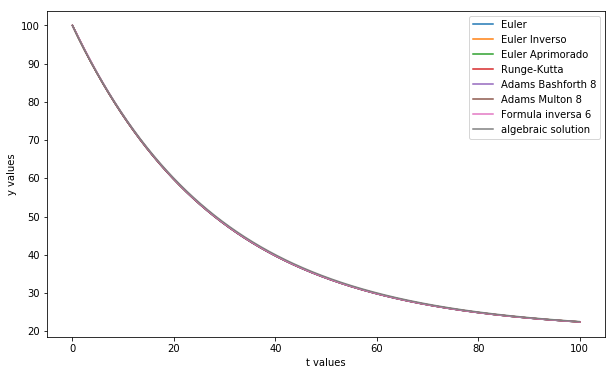

In [56]:
main(lambda t : 20 + 80*np.exp(-np.log(2)*t/20))

In [63]:
def zoom_plot(begin, end, callback):
    with open("entrada.txt") as file_in:
        global method_cache
        n = len(method_cache["euler"][0])
        h = method_cache["euler"][0][1] - method_cache["euler"][0][0]
        for line in file_in:
            strin = line.split(' ')
            plt.plot(method_cache[strin[0]][0][begin:end], method_cache[strin[0]][1][begin:end], label = strin[0])
#             begin += 1
#             end += 1

        print(n)
        x = np.arange(n)
        x = x*h
        x = x[begin:end]
        plt.plot(x, callback(x), label="algebraic solution")
        show_graphic()

1001


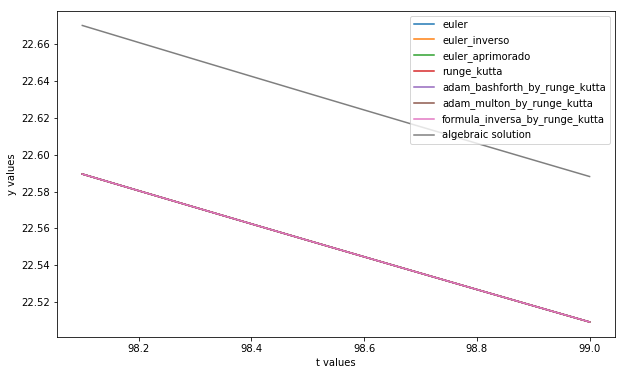

In [64]:
zoom_plot(-20, -10, lambda t : 20 + 80*np.exp(-np.log(2)*t/20))

### Resolvendo a EDO a partir dos Métodos Implementados

Considerando a EDO dada na questão:

\begin{equation}
    \label{eq_concentracao}
    T' = -k (T - T_{a})
\end{equation}

Assumindo que as entradas utilizadas seguem o padrão abaixo
- Para euler, euler inverso, euler aprimorado e runge-kutta: método y0 t0 h n f(t,y)
- Para adams bashforth, adams multon e fórmula inversa por outros métodos: método y0 t0 h n f(t,y) ordem

E que, para tornar o gráfico legivel, calcularemos apenas os métodos de Euler, Euler Inverso, Euler Aprimorado, Runge-Kutta, Adam Bashforth e Adam Moulton por Runge-Kutta de 8˚ ordem e Fórmula Inversa por Runge-Kutta de 6˚ ordem, faremos as análises abaixo:

#### a) 
Na letra A temos que:   
$T_{a} = 20˚C$  
$k = \frac{1}{2}\ln(\frac{10}{3})$   
$t \text{ em horas}$

Logo, a equação que será usada no projeto será
\begin{equation*}
    \label{eq_concentracao_1}
    T' = -\frac{1}{2}\ln(\frac{10}{3})(T - 20)
\end{equation*}

\begin{equation}
    \label{eq_concentracao_4}
    T' = 12-0.6T
\end{equation}

E para realizar a dedução com a equação exata será utilizada é dada por resolver a equação diferencial
\begin{equation*}
    12 - 0.6T = e^{-0.6t}
\end{equation*}

\begin{equation}
    \label{eq_concentracao_5}
    T(t) = \frac{60 - 5 \cdot e^{-0.6t}}{3}
\end{equation}

#### b)
Na letra B temos que:   
$T_{a} = 20˚C$  
$k = \frac{1}{20}\ln(2)$  
$t \text{ em minutos}$

Logo, a equação que será usada no projeto será
\begin{equation*}
    \label{eq_concentracao_2}
    T' = -\frac{1}{20}\ln(2)(T - 20)
\end{equation*}

\begin{equation}
    \label{eq_concentracao_3}
    T' = 0.7 - 0.035T
\end{equation}

E para realizar a dedução com a equação exata será utilizada é dada por resolver a equação diferencial
\begin{equation}
    \label{eq_concentracao_6}
    T(t) = 20 + 80e^{-\frac{1}{20}\ln(2)t}
\end{equation}

E a entrada utilizada:

``` 
euler 100 0 0.1 400 0.7-0.035*y
euler_inverso 100 0 0.1 400 0.7-0.035*y
euler_aprimorado 100 0 0.1 400 0.7-0.035*y
runge_kutta 100 0 0.1 400 0.7-0.035*y
adam_bashforth_by_runge_kutta 100 0 0.1 400 0.7-0.035*y 8
adam_multon_by_runge_kutta 100 0 0.1 400 0.7-0.035*y 8
formula_inversa_by_runge_kutta 100 0 0.1 400 0.7-0.035*y 6
```


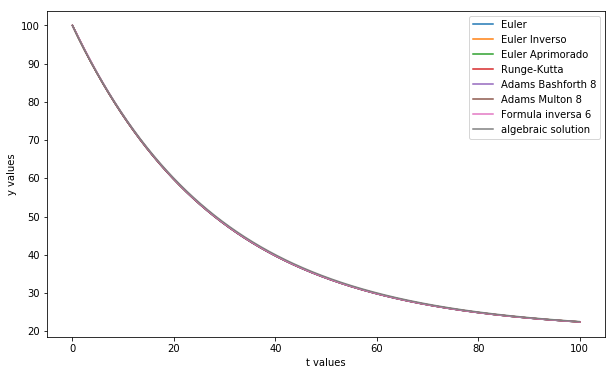

In [65]:
main(lambda t : 20 + 80*np.exp(-np.log(2)*t/20))

1001


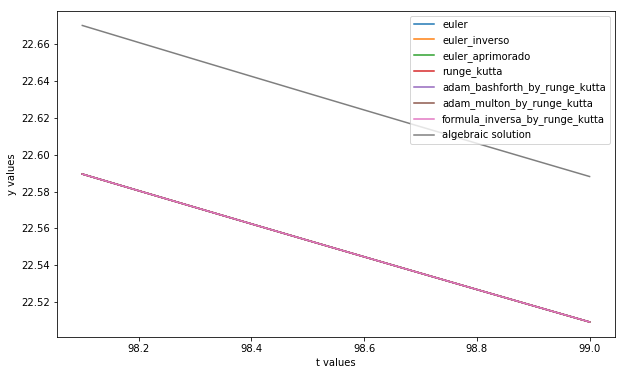

In [66]:
zoom_plot(-20, -10, lambda t : 20 + 80*np.exp(-np.log(2)*t/20))